In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/smhrd34567/Train.csv', index_col='ID')
test = pd.read_csv('./data/smhrd34567/test.csv', index_col='ID')
sub = pd.read_csv('./data/smhrd34567/sampleSubmission.csv')

In [3]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [4]:
train.info()
#결측치 있는 컬럼 : Customer_care_calls, Prior_purchases, Discount_offered
# ? 있는 컬럼 : Mode_of_Shipment, Product_importance, Weight_in_gms
# 나머지 :  Warehouse_block , Customer_rating, Cost_of_the_Product, Gender

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [5]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.013420,0.047041,0.173709,-0.158465,-0.070266
Customer_rating,0.013420,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.047041,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,0.173709,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,-0.158465,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.070266,0.011275,-0.012811,-0.065160,0.397393,1.000000


In [6]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,5423.000000,6999.000000,6999.000000,6049.000000,3468.000000,6999.000000
mean,4.054582,3.023718,214.249178,3.576294,13.269031,0.594656
std,1.131019,2.149861,208.294273,1.530933,16.070188,0.490993
min,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [7]:
test.info()
#결측치 있는 컬럼 : Customer_care_calls, Prior_purchases, Discount_offered
# ? 있는 컬럼 : Mode_of_Shipment, Product_importance, Weight_in_gms

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


In [8]:
test.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered
Customer_care_calls,1.000000,0.020970,0.083431,0.179432,-0.133178
Customer_rating,0.020970,1.000000,0.017817,0.019384,0.006200
Cost_of_the_Product,0.083431,0.017817,1.000000,0.016252,-0.118051
Prior_purchases,0.179432,0.019384,0.016252,1.000000,-0.050045
Discount_offered,-0.133178,0.006200,-0.118051,-0.050045,1.000000


F    0.330190
C    0.169167
A    0.167738
D    0.166881
B    0.166024
Name: Warehouse_block, dtype: float64

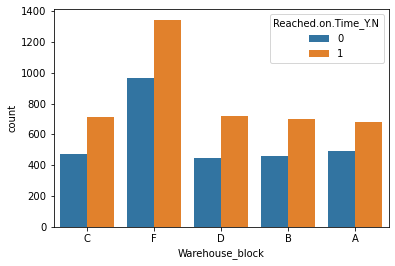

In [9]:
train['Warehouse_block']=train['Warehouse_block ']
test['Warehouse_block']=test['Warehouse_block ']
sns.countplot(data=train, x='Warehouse_block', hue='Reached.on.Time_Y.N')
train['Warehouse_block'].value_counts('Reached.on.Time_Y.N')

In [10]:
train.drop('Warehouse_block ', axis=1, inplace=True)
test.drop('Warehouse_block ', axis=1, inplace=True)
train['Warehouse_block']

ID
1       C
2       F
3       F
4       F
5       D
       ..
6995    D
6996    F
6997    D
6998    A
6999    A
Name: Warehouse_block, Length: 6999, dtype: object

 Ship        0.644092
 Road        0.153593
 Flight      0.148450
?            0.053293
 Shipzk      0.000286
 Flightzk    0.000143
 Roadzk      0.000143
Name: Mode_of_Shipment, dtype: float64

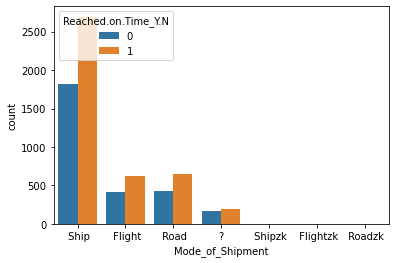

In [11]:
sns.countplot(data=train, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
train['Mode_of_Shipment'].value_counts('Reached.on.Time_Y.N')

In [12]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Ship','Ship')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Road','Road')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flight','Flight')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Shipzk','Ship')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Roadzk','Road')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flightzk','Flight')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace('?','Ship')

test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Ship','Ship')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Road','Road')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Flight','Flight')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Shipzk','Ship')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Roadzk','Road')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace(' Flightzk','Flight')
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace('?','Ship')

4.0    1756
3.0    1620
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64


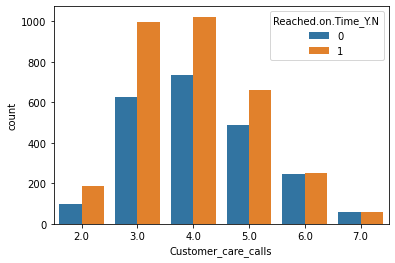

In [13]:
sns.countplot(data=train, x='Customer_care_calls', hue='Reached.on.Time_Y.N')
print(train['Customer_care_calls'].value_counts())

In [14]:
#train['Customer_care_calls'].fillna(4, inplace = True)
#test['Customer_care_calls'].fillna(4, inplace = True)
train.drop('Customer_care_calls', axis=1, inplace=True)
test.drop('Customer_care_calls', axis=1, inplace=True)

<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

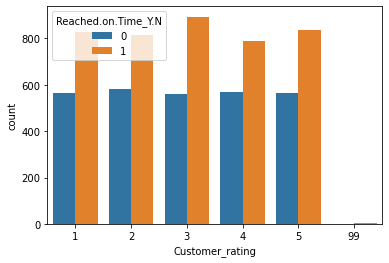

In [15]:
sns.countplot(data=train, x='Customer_rating', hue='Reached.on.Time_Y.N')

In [16]:
train['Customer_rating'] = train['Customer_rating'].replace(99,3)
train['Customer_rating'].value_counts()
test['Customer_rating'] = test['Customer_rating'].replace(99,3) 
test['Customer_rating'].value_counts()
# 1~5등급까지만 있으므로 99의 값을 3으로 변경

1    843
4    831
3    790
5    772
2    764
Name: Customer_rating, dtype: int64

In [17]:
train['Cost_of_the_Product'][train['Cost_of_the_Product']==9999]
# 9999인 사람이 3명(이상치)

ID
112     9999
6256    9999
6613    9999
Name: Cost_of_the_Product, dtype: int64

In [18]:
train['Cost_of_the_Product'][train['Cost_of_the_Product']!=9999].mean()

210.05331618067467

In [19]:
train['Cost_of_the_Product'] = train['Cost_of_the_Product'].replace(9999,210)
test['Cost_of_the_Product'] = test['Cost_of_the_Product'].replace(9999,210)

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='count'>

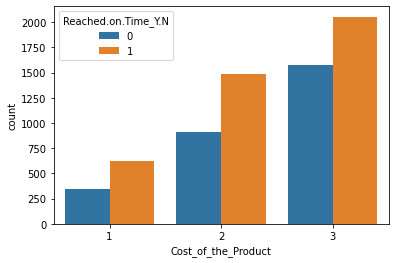

In [20]:
b = [90, 150, 210, 9999]
l = [1,2,3]
train['Cost_of_the_Product']=pd.cut(train['Cost_of_the_Product'], bins= b, labels = l)
sns.countplot(data=train, x='Cost_of_the_Product', hue='Reached.on.Time_Y.N')

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64


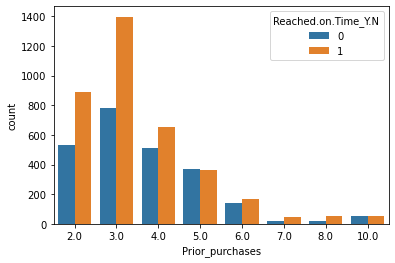

In [21]:
sns.countplot(data=train, x='Prior_purchases', hue='Reached.on.Time_Y.N')
print(train['Prior_purchases'].value_counts())

In [22]:
train['Prior_purchases'].fillna(3.6, inplace = True)
test['Prior_purchases'].fillna(3.6, inplace = True)

In [23]:
train['Product_importance'] = train['Product_importance'].replace('loww','low')
train['Product_importance'] = train['Product_importance'].replace('highh','high')
train['Product_importance'] = train['Product_importance'].replace('mediumm','medium')
train['Product_importance'] = train['Product_importance'].replace('?','low')
test['Product_importance'] = test['Product_importance'].replace('loww','low') 
test['Product_importance'] = test['Product_importance'].replace('highh','high') 
test['Product_importance'] = test['Product_importance'].replace('mediumm','medium')
test['Product_importance'] = test['Product_importance'].replace('?','low')

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

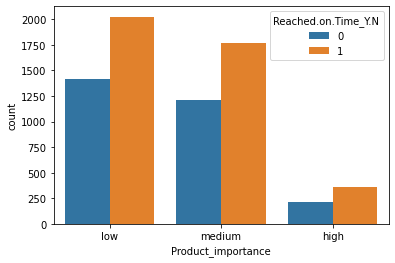

In [24]:
sns.countplot(data=train, x='Product_importance', hue='Reached.on.Time_Y.N')

<AxesSubplot:xlabel='Gender', ylabel='count'>

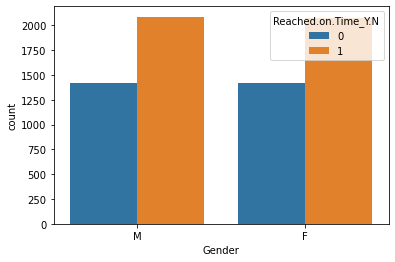

In [25]:
sns.countplot(data=train, x='Gender', hue='Reached.on.Time_Y.N')

9.0     287
2.0     278
10.0    278
3.0     277
1.0     272
       ... 
50.0     10
18.0     10
42.0      9
26.0      8
43.0      7
Name: Discount_offered, Length: 65, dtype: int64
count    3468.000000
mean       13.269031
std        16.070188
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        65.000000
Name: Discount_offered, dtype: float64


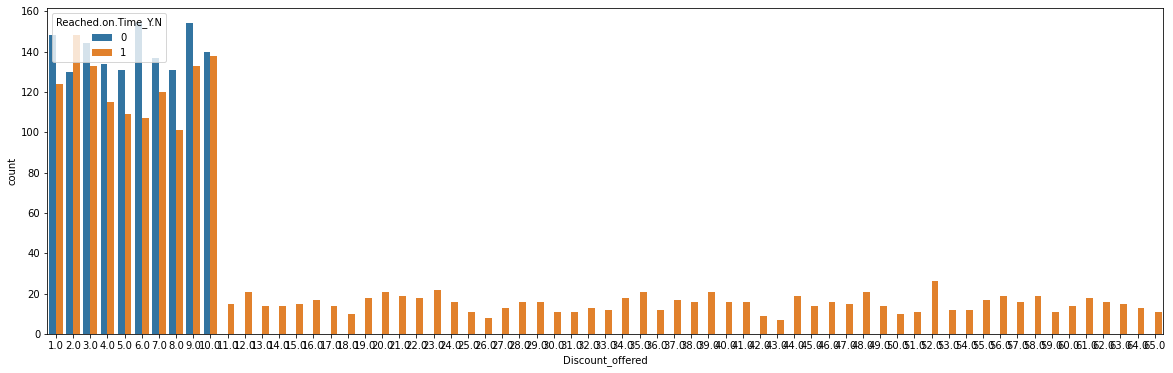

In [26]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train, x='Discount_offered', hue='Reached.on.Time_Y.N')
print(train['Discount_offered'].value_counts())
#1~65까지의 값
print(train['Discount_offered'].describe())
#1~10까지의 값이 전체의 75퍼센트 차지
# 10이하일때 0일 확률 높다

In [27]:
train['Discount_offered'].fillna(7, inplace = True)
test['Discount_offered'].fillna(7, inplace = True)
#결측치를 중앙값인 7로 채워보기

In [28]:
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?',3656).astype('int64')
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?',3656).astype('int64')
#?를 평균무게인 3656으로 채워보기

In [29]:
b = [1000,1500,2000,4000,4500,5000,5500,8000]
l = [0,1,2,3,4,5,6]
train['Weight_in_gms'] = pd.cut(train['Weight_in_gms'], bins= b, labels = l)
test['Weight_in_gms'] = pd.cut(test['Weight_in_gms'], bins= b, labels = l)

In [30]:
test['Weight_in_gms'].unique

<bound method Series.unique of ID
7000     3
7001     0
7002     5
7003     1
7004     5
        ..
10995    1
10996    2
10997    4
10998    1
10999    0
Name: Weight_in_gms, Length: 4000, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]>

<AxesSubplot:xlabel='Weight_in_gms', ylabel='count'>

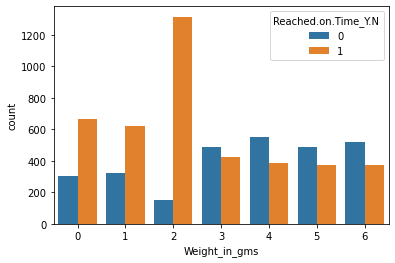

In [31]:
sns.countplot(data=train, x='Weight_in_gms', hue='Reached.on.Time_Y.N')
#무게가 4000이상이면, 도달하지 않을 확률이 높다.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Mode_of_Shipment     6999 non-null   object  
 1   Customer_rating      6999 non-null   int64   
 2   Cost_of_the_Product  6999 non-null   category
 3   Prior_purchases      6999 non-null   float64 
 4   Product_importance   6999 non-null   object  
 5   Gender               6999 non-null   object  
 6   Discount_offered     6999 non-null   float64 
 7   Weight_in_gms        6999 non-null   category
 8   Reached.on.Time_Y.N  6999 non-null   int64   
 9   Warehouse_block      6999 non-null   object  
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 764.3+ KB


In [33]:
train.drop('Gender', axis=1, inplace=True)
test.drop('Gender', axis=1, inplace=True)

In [34]:
train.columns

Index(['Mode_of_Shipment', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Warehouse_block'],
      dtype='object')

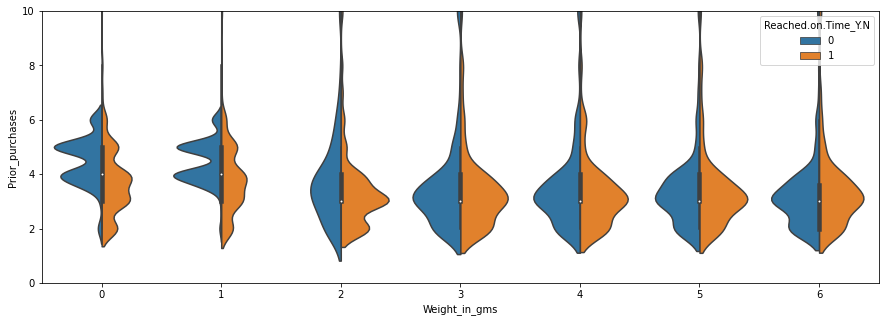

In [35]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x= 'Weight_in_gms',
              y='Prior_purchases',
              hue='Reached.on.Time_Y.N',
              split=True)
plt.ylim(0,10)
plt.show()

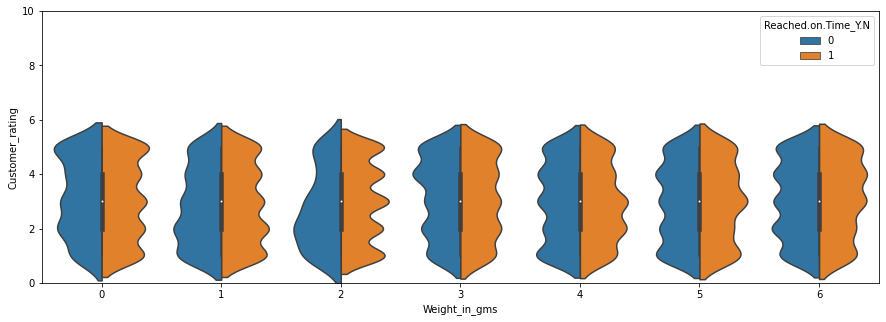

In [52]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x= 'Weight_in_gms',
              y='Customer_rating',
              hue='Reached.on.Time_Y.N',
              split=True)
plt.ylim(0,10)
plt.show()

In [36]:
X_train = train.drop('Reached.on.Time_Y.N', axis=1) # 드랍을 이용한 분리
y_train = train['Reached.on.Time_Y.N']
X_test = test
print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제:', X_test.shape)

훈련문제: (6999, 8)
훈련답: (6999,)
테스트문제: (4000, 8)


In [37]:
cat_feature = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
# X_train 원핫인코딩
for cat_name in cat_feature:
    dummy = pd.get_dummies(train[cat_name], prefix = cat_name)
    X_train = pd.concat([X_train, dummy], axis=1)
    X_train.drop(cat_name, axis=1, inplace = True)
    

# X_test 원핫인코딩
for cat_name in cat_feature:
    dummy = pd.get_dummies(test[cat_name], prefix = cat_name)
    X_test = pd.concat([X_test, dummy], axis=1)
    X_test.drop(cat_name, axis=1, inplace = True)
    
print(X_train.shape)
print(X_test.shape)

(6999, 16)
(4000, 16)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [39]:
k_model = KNeighborsClassifier()
t_model = DecisionTreeClassifier()

In [40]:
train.to_csv('./data/smhrd34567/Train2.csv', index = False)
test.to_csv('./data/smhrd34567/test2.csv', index = False)

In [41]:
k_model.fit(X_train,y_train)
t_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
k_result = cross_val_score(k_model,X_train,y_train)
k_result.mean()

0.6323759828448893

In [43]:
tree_result = cross_val_score(t_model,X_train,y_train)
tree_result.mean()

0.617373123659757

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1500,  # 생성할 트리개수
                                max_features = 0.6, # 사용할 특성의 비율
                                max_depth= 5,
                                min_samples_leaf= 10,
                                n_jobs=-1
                               )
forest.fit(X_train, y_train)
pre = forest.predict(X_test)

In [45]:
sub['Reached.on.Time_Y.N'] = pre
sub.to_csv('./data/smhrd34567/RF.csv', index = False)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 500,
                               learning_rate = 0.01,
                               max_features = 0.7,
                               max_depth = 5,
                               min_samples_leaf = 20)
gb.fit(X_train, y_train)
pre = gb.predict(X_test)
sub['Reached.on.Time_Y.N'] = pre
sub.to_csv('./data/smhrd34567/GB.csv', index = False)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [2000],
    'max_features' : [0.7],
    'max_depth' : [6],
    'min_samples_leaf' : [30],
    'n_jobs' : [-1 ]
}
grid = GridSearchCV(forest, param_grid, cv=3,  verbose=2)
grid.fit(X_train, y_train)
print('best score : ', grid.best_score_)
print('best parmas:', grid.best_params_)
pre = grid.predict(X_test)
sub['Reached.on.Time_Y.N'] = pre
sub.to_csv('./data/smhrd34567/GS.csv', index = False)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=6, max_features=0.7, min_samples_leaf=30, n_estimators=2000, n_jobs=-1; total time=   3.4s
[CV] END max_depth=6, max_features=0.7, min_samples_leaf=30, n_estimators=2000, n_jobs=-1; total time=   1.8s
[CV] END max_depth=6, max_features=0.7, min_samples_leaf=30, n_estimators=2000, n_jobs=-1; total time=   1.8s
best score :  0.676668095442206
best parmas: {'max_depth': 6, 'max_features': 0.7, 'min_samples_leaf': 30, 'n_estimators': 2000, 'n_jobs': -1}


PermissionError: [Errno 13] Permission denied: './data/smhrd34567/GS.csv'